## Curvature in Kuramoto nets

#### 1st order

Goals
- Synchrony as curvature 
- Curvature promoting synchrony
- Adaptive synching graph is Ricci flow


To do:
- [] Port code
- [] Skeleton work book
- [x] Functions in seperate files
- [] Ricci Curvature package
- [] Run single experiments for each part
- [] Expand to loops for variables
    - What are the variables?

In [6]:
from functions import *
from SOnet import *
import numpy as np
import networkx as nx
import scipy.integrate as odeint
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import math 
import csv
import colour 


In [7]:
test = [0,1,2,3,4,5,6,7,8,9,10,11,12]
iii = 4 
print(test[0:iii])
print(test[iii:-1])

[0, 1, 2, 3]
[4, 5, 6, 7, 8, 9, 10, 11]


In [8]:
'''
SETUP
'''
N = 10# No. nodes
k = 100# Coupling strength
connectivity = 1 # erdos connectivity probability
var,mean = 0.7, 0

Qnat = True # Natural Frequency update?
Qup = False # Weights updating 

T = 0.1# Time the sime will run
res = 100000
time = np.linspace(0,T,res)
dt = T/res
results = np.zeros((res,N))
evo_adj = np.zeros((N,N,res))
graph_nx = nx.erdos_renyi_graph(n=N, p=connectivity) # p=1 -> all-to-all connectivity
graph = nx.to_numpy_array(graph_nx)*k
net = Net("Test",graph,N,k,dt,var,mean,2,[0,3.14],1,1)

In [9]:
print(np.shape(net.state))
print(net.nats)
print(net.state[net.n:])
print(net.phase)
print(net.state[0:net.n])

(20, 1)
[[ 0.1014473 ]
 [ 0.09984405]
 [ 0.10098447]
 [ 0.10041101]
 [ 0.09818878]
 [ 0.09943534]
 [ 0.09912786]
 [ 0.10121026]
 [ 0.10041219]
 [ 0.09909636]]
[[ 0.1014473 ]
 [ 0.09984405]
 [ 0.10098447]
 [ 0.10041101]
 [ 0.09818878]
 [ 0.09943534]
 [ 0.09912786]
 [ 0.10121026]
 [ 0.10041219]
 [ 0.09909636]]
[[ -3.86971935e-04]
 [ -1.22429506e-03]
 [ -1.62985988e-03]
 [ -5.64514345e-03]
 [ -7.65194454e-04]
 [  3.14077632e+00]
 [  3.13488695e+00]
 [  3.14142118e+00]
 [  3.14262345e+00]
 [  3.14353738e+00]]
[[ -3.86971935e-04]
 [ -1.22429506e-03]
 [ -1.62985988e-03]
 [ -5.64514345e-03]
 [ -7.65194454e-04]
 [  3.14077632e+00]
 [  3.13488695e+00]
 [  3.14142118e+00]
 [  3.14262345e+00]
 [  3.14353738e+00]]


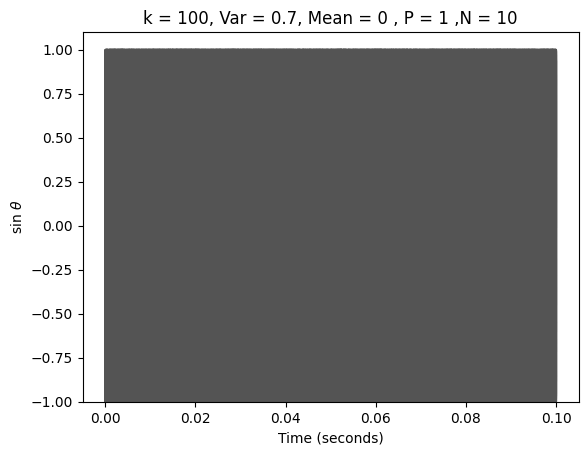

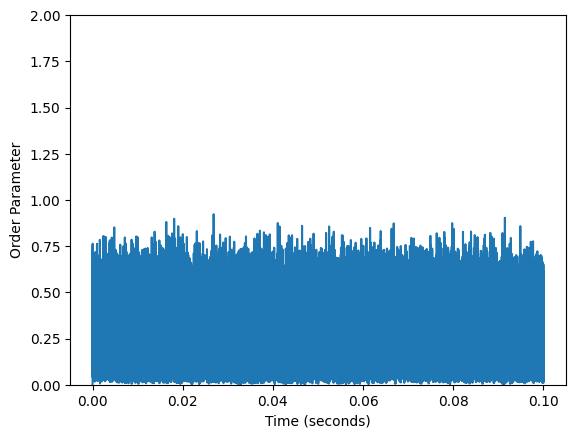

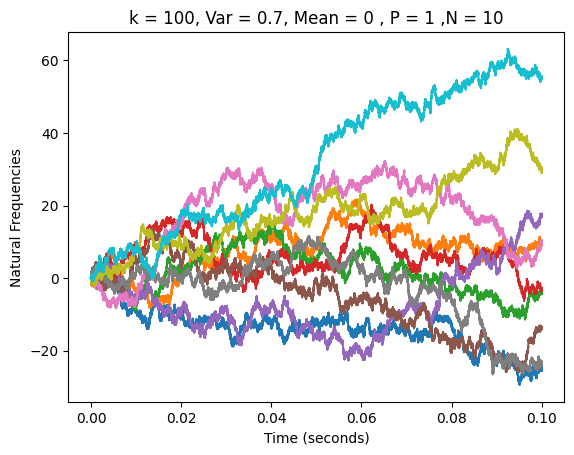

In [10]:
'''
RUN
'''
results, theta = RunAndPlot(time,net,T,res,N,k,var,mean,connectivity)
